## Read and plot near-real-time Wave Glider data

first cut by Tom, 10/18/2021
Updated for IOP1, 10/9/2022

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
import functions  # requires functions.py from this directory

In [2]:
%matplotlib inline
# %matplotlib qt5
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'SMODE_'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

In [3]:
savefig = True
zoom = False
if zoom:
    xmin, xmax = (-126,-121)
    ymin, ymax = (36.25,38.5)
    levels = np.linspace(14,17,21)-2.5
else:
    xmin, xmax = (-127,-121)
    ymin, ymax = (35, 41)
    levels = np.linspace(13,18,11)

    

In [4]:
url = 'http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/SV3-1043_PLD1_TAB1.nc#mode=bytes'
ds_payload1_table1 = xr.open_dataset(url)

In [5]:
url = 'http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/SV3-1043_PLD2_TAB1.nc#mode=bytes'
ds_payload2_table1 = xr.open_dataset(url)

In [6]:
url = 'http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/SV3-1043_PLD2_TAB2.nc#mode=bytes'
ds_payload2_table2 = xr.open_dataset(url,drop_variables=['z'])

In [7]:
url = 'http://smode.whoi.edu:8080/thredds/fileServer/IOP1_2022/waveglider/SV3-1043_PLD2_TAB3.nc#mode=bytes'
ds_payload2_table3 = xr.open_dataset(url,drop_variables=['freq'])

In [8]:
ds_payload1_table1

<xarray.Dataset>
Dimensions:                      (time: 1107)
Coordinates:
  * time                         (time) datetime64[ns] 2022-09-22T02:31:28 .....
Data variables: (12/51)
    year                         (time) float32 ...
    day                          (time) float32 ...
    hour                         (time) float32 ...
    minute                       (time) float32 ...
    sec                          (time) float32 ...
    RECORD                       (time) float32 ...
    ...                           ...
    vn_sat1_Avg                  (time) float32 ...
    index_vnav_file              (time) float32 ...
    index_10hz_file              (time) float32 ...
    index_20hz_file              (time) float32 ...
    index_ad2cp_file             (time) float32 ...
    index_vnav2_file             (time) float32 ...
Attributes:
    Name:                 SV3-1043_PLD1_TAB1
    wms_title:            SV3-1043_PLD1_TAB1
    title:                S-MODE IOP1 2022 Waveglider SV3-1043 real-time data...
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2022-10-09 14:30Z Downloaded real-time data from WG...
    time_coverage_start:  2022-09-21T22:31:00
    time_coverage_end:    2022-10-03T13:46:00

In [9]:
ds_payload2_table1

<xarray.Dataset>
Dimensions:                      (time: 1103)
Coordinates:
  * time                         (time) datetime64[ns] 2022-09-22T03:46:08 .....
Data variables: (12/49)
    year                         (time) float32 ...
    day                          (time) float32 ...
    hour                         (time) float32 ...
    minute                       (time) float32 ...
    sec                          (time) float32 ...
    RECORD                       (time) float32 ...
    ...                           ...
    uctd_cond_Avg                (time) float32 ...
    SMP21_flux_Wm2_Avg           (time) float32 ...
    SGR4_flux_Wm2_Avg            (time) float32 ...
    index_1hz_file               (time) float32 ...
    index_10hz_file              (time) float32 ...
    index_ADCP_file              (time) float32 ...
Attributes:
    Name:                 SV3-1043_PLD2_TAB1
    wms_title:            SV3-1043_PLD2_TAB1
    title:                S-MODE IOP1 2022 Waveglider SV3-1043 real-time data...
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2022-10-09 14:30Z Downloaded real-time data from WG...
    time_coverage_start:  2022-09-21T23:46:00
    time_coverage_end:    2022-10-03T13:46:00

In [10]:
ds_payload2_table2

<xarray.Dataset>
Dimensions:               (time: 1108, z: 50)
Coordinates:
  * time                  (time) datetime64[ns] 2022-09-22T03:46:08 ... 2022-...
Dimensions without coordinates: z
Data variables:
    year                  (time) float32 ...
    day                   (time) float32 ...
    hour                  (time) float32 ...
    minute                (time) float32 ...
    sec                   (time) float32 ...
    RECORD                (time) float32 ...
    roll_ADCP_Avg         (time) float32 ...
    pitch_ADCP_Avg        (time) float32 ...
    heading_ADCP_Avg      (time) float32 ...
    Temperature_ADCP_Avg  (time) float32 ...
    current_east          (z, time) float32 ...
    current_north         (z, time) float32 ...
Attributes:
    Name:                 SV3-1043_PLD2_TAB2
    wms_title:            SV3-1043_PLD2_TAB2
    title:                S-MODE IOP1 2022 Waveglider SV3-1043 real-time data...
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2022-10-09 14:30Z Downloaded real-time data from WG...
    time_coverage_start:  2022-09-21T23:47:00
    time_coverage_end:    2022-10-03T13:47:00

In [11]:
ds_payload2_table3

<xarray.Dataset>
Dimensions:  (time: 1110, freq: 50)
Coordinates:
  * time     (time) datetime64[ns] 2022-09-22T03:48:16 ... 2022-10-03T17:48:48
Dimensions without coordinates: freq
Data variables:
    year     (time) float32 ...
    day      (time) float32 ...
    hour     (time) float32 ...
    minute   (time) float32 ...
    sec      (time) float32 ...
    RECORD   (time) float32 ...
    f2xSuu   (freq, time) float32 ...
    theta    (freq, time) float32 ...
    Suu      (freq, time) float32 ...
    Szz      (freq, time) float32 ...
Attributes:
    Name:                 SV3-1043_PLD2_TAB3
    wms_title:            SV3-1043_PLD2_TAB3
    title:                S-MODE IOP1 2022 Waveglider SV3-1043 real-time data...
    instrument:           Liquid Robotics SV3 Waveglider
    sea_name:             Pacific
    keywords:             Waveglider, S-MODE, Pacific Ocean, Temperature
    history:              2022-10-09 14:30Z Downloaded real-time data from WG...
    time_coverage_start:  2022-09-21T23:48:00
    time_coverage_end:    2022-10-03T13:48:00

## Plot some health diagnostics for monitoring
Around 1200 UTC on 10/20/2021, a wave broke the lashings on the WGs, and this is a real-time effort to assess the status of the instruments

The data file of most interest at the moment is ```ds_payload2_table1```

In [12]:
ds = ds_payload2_table1

/home/jtomf/miniconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/tmp/ipykernel_15356/472945995.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ax.plot(x0+np.asarray([0, 0]),y0+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree(),color='k')


{'transform': <cartopy.crs.PlateCarree object at 0x7f47d6252d60>, 'color': 'k'}


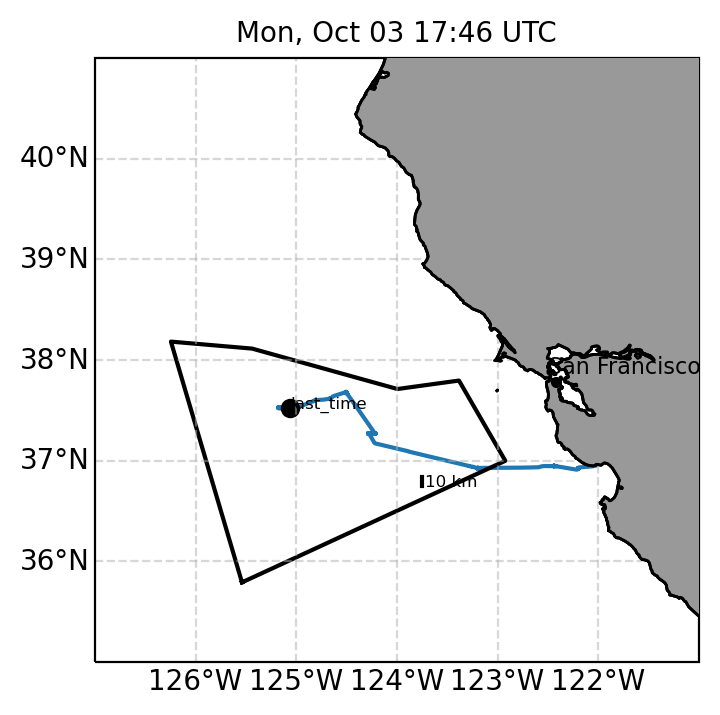

In [13]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
'''
daystr=ds.time.dt.day.astype(str).values[0]
monstr=ds.time.dt.month.astype(str).values[0]
yrstr=ds.time.dt.year.astype(str).values[0]
day_str = monstr+'-'+daystr+'-'+yrstr
'''
day_str=ds.time.isel(time=-1).dt.strftime("%a, %b %d %H:%M").values
ax.set_title(day_str+' UTC', size = 10.)

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
ax.add_feature(cartopy.feature.STATES, zorder=3, edgecolor='black')
ax.plot(ds.longitude_1hz_Avg,ds.latitude_1hz_Avg,transform=ccrs.PlateCarree())
ax.plot(ds.longitude_1hz_Avg.isel(time=-1),ds.latitude_1hz_Avg.isel(time=-1),'ko',transform=ccrs.PlateCarree())
ax.text(ds.longitude_1hz_Avg.isel(time=-1),ds.latitude_1hz_Avg.isel(time=-1), 'last_time', fontsize=6, transform=ccrs.PlateCarree())
# cs = ax.contourf(ds.lon,ds.lat,np.squeeze(ds.sea_surface_temperature)-273.15, levels, extend='both', transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,fraction = 0.022,extend='both')
# cb.set_label('SST [$\circ$C]',fontsize = 10)
functions.plot_ops_area(ax,transform=ccrs.PlateCarree(),color='k')

# Add a 10 km scale bar
km_per_deg_lat=gsw.geostrophy.distance((125,125), (37,38))/1000
deg_lat_equal_10km=10/km_per_deg_lat
x0 = -123.75
y0 = 36.75
ax.plot(x0+np.asarray([0, 0]),y0+np.asarray([0.,deg_lat_equal_10km]),transform=ccrs.PlateCarree(),color='k')
ax.text(x0+2/60, y0-.5/60, '10 km', fontsize=6,transform=ccrs.PlateCarree())

if savefig:
    plt.savefig(__figdir__+'_foo_WG_pos_' + day_str + '.' +plotfiletype,**savefig_args)


In [14]:
ds.longitude_1hz_Avg

<xarray.DataArray 'longitude_1hz_Avg' (time: 1103)>
array([-122.002, -122.002, -122.002, ..., -125.06 , -125.059, -125.057],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2022-09-22T03:46:08 ... 2022-10-03T17:46:40
Attributes:
    units:    degrees

In [15]:
ds["time"].dt.strftime("%a, %b %d %H:%M")


<xarray.DataArray 'strftime' (time: 1103)>
array(['Thu, Sep 22 03:46', 'Thu, Sep 22 04:01', 'Thu, Sep 22 04:30', ...,
       'Mon, Oct 03 17:16', 'Mon, Oct 03 17:31', 'Mon, Oct 03 17:46'],
      dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 2022-09-22T03:46:08 ... 2022-10-03T17:46:40

In [16]:
day_str=ds.time.isel(time=-1).dt.strftime("%a, %b %d %H:%M")


In [17]:
print(day_str.values)

Mon, Oct 03 17:46


Payload 2 Table 1 has met, ctd variables  
Payload 2 Table 2 has RDI variables